In [5]:
sentences = [
    "오늘 날씨가 좋아서 나들이 가고 싶다.",
    "이 영화는 정말 재미있었어요.",
    "맛있는 음식을 먹으러 갈까요?",
    "운동을 하면 건강에 좋아지는 것 같아요.",
    "공부하기 싫어서 미루고 있어요.",
    "여행 계획을 세우고 있는데 어디로 갈까요?",
    "좋은 책을 읽으면 마음이 편안해져요.",
    "오늘은 친구들과 만나서 재미있게 놀았어요.",
    "새로운 언어를 배우는 것은 어려워도 흥미로워요.",
    "주말에 가족들과 함께 시간을 보내기로 했습니다."
]

In [6]:
from gensim.corpora import Dictionary 
from gensim.models import LdaModel # 주제어 확인 

### 전처리 (형태소 분석, 불용어 처리 등)

In [7]:
from mecab import MeCab
mecab = MeCab()

In [8]:
#형태분석기 사용
morphs_list = list()
for sentence in sentences:
    morphs = mecab.nouns(sentence)
    morphs_list.append(morphs) #2차원 배열
morphs_list #1차원으로 추출 

[['날씨', '나'],
 ['영화'],
 ['음식'],
 ['운동', '건강', '것'],
 ['공부'],
 ['여행', '계획', '어디'],
 ['책', '마음', '편안'],
 ['오늘', '친구'],
 ['언어', '것', '흥미'],
 ['주말', '가족', '시간']]

In [9]:
preprocessed_sentences = morphs_list

In [10]:
dictionary = Dictionary(preprocessed_sentences) #fit in like sklearn
dictionary

### transform with dictionary

In [11]:
# dictionary.token2id  #단어(토큰)를 해당 단어의 고유한 숫자 ID로 매핑한 딕셔너리
dictionary.doc2bow(preprocessed_sentences[0]) #transform 좌표값이 들어감

[(0, 1), (1, 1)]

In [12]:
corpus_list = list()
for sentence in  preprocessed_sentences :
    morphs_vector = dictionary.doc2bow(sentence)
    corpus_list.append(morphs_vector)
corpus_list

[[(0, 1), (1, 1)],
 [(2, 1)],
 [(3, 1)],
 [(4, 1), (5, 1), (6, 1)],
 [(7, 1)],
 [(8, 1), (9, 1), (10, 1)],
 [(11, 1), (12, 1), (13, 1)],
 [(14, 1), (15, 1)],
 [(5, 1), (16, 1), (17, 1)],
 [(18, 1), (19, 1), (20, 1)]]

In [13]:
lda_model = LdaModel(corpus=corpus_list, id2word=dictionary, num_topics=3)  #fit
#벡터화된 숫자와, dictionary를 함께 넣어줘서 숫자와 실제 단어를 연결하여 알수 있게끔
# num_topics=3 토픽 3가지만 잡아줘 

In [14]:
lda_model.print_topics(num_words=5) # num_words 주요 토픽 5가지를 잡아줘 

[(0, '0.081*"것" + 0.080*"시간" + 0.080*"가족" + 0.080*"주말" + 0.079*"마음"'),
 (1, '0.099*"나" + 0.098*"날씨" + 0.098*"오늘" + 0.095*"친구" + 0.092*"음식"'),
 (2, '0.092*"것" + 0.090*"어디" + 0.090*"여행" + 0.090*"계획" + 0.089*"언어"')]

### 최적의 토픽 단어 수

In [15]:
## 일관성 점수
from gensim.models.coherencemodel import CoherenceModel
coherenceModel = CoherenceModel(model=lda_model, texts=morphs_list, dictionary=dictionary)
coherenceModel.get_coherence() 
# num_topics=3에 관해서 일관성이 높으냐 적으냐에 대한 점수 
# 0.7228238031135038

In [19]:
## 혼잡도 점수 
lda_model.log_perplexity(corpus_list)

#-4.1042908865036285

-4.1042908865036285

In [20]:
start_topic = 2
end_topic = 10
coherence_scores = list()
perplexity_scores = list()
for topic_number in range(start_topic, end_topic+1 ) : 
    lda_model = LdaModel(corpus=corpus_list, id2word=dictionary, num_topics=topic_number)  #fit
    coherenceModel = CoherenceModel(model=lda_model, texts=morphs_list, dictionary=dictionary)
    coherence_scores.append(coherenceModel.get_coherence())  #일관성 점수
    perplexity_scores.append(lda_model.log_perplexity(corpus_list)) #혼잡도 점수

In [36]:
import pandas as pd
df_scores = pd.DataFrame([coherence_scores, perplexity_scores])
df_scores.T

# 혼잡도가 적고, 일관성이 높은것을 찾으면 됨 
# 최적의 인덱스 0 실제로는 num_topics=2 즉 2개의 토픽 

,0,1
0,0.722258,-3.892453
1,0.723955,-4.129781
2,0.722258,-4.237078
3,0.722598,-4.377838
4,0.723955,-4.495389
5,0.723470,-4.534750
6,0.721834,-4.738275
7,0.722824,-5.009686
8,0.723276,-4.792280


In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

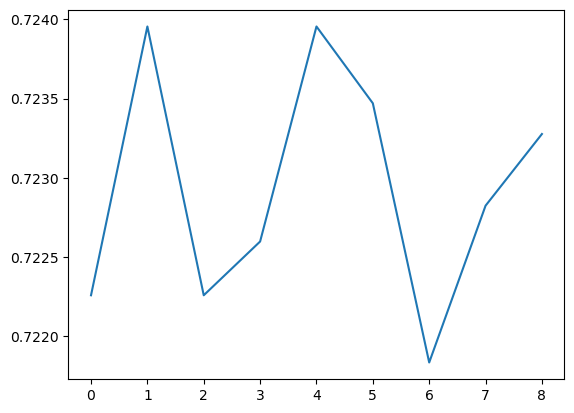

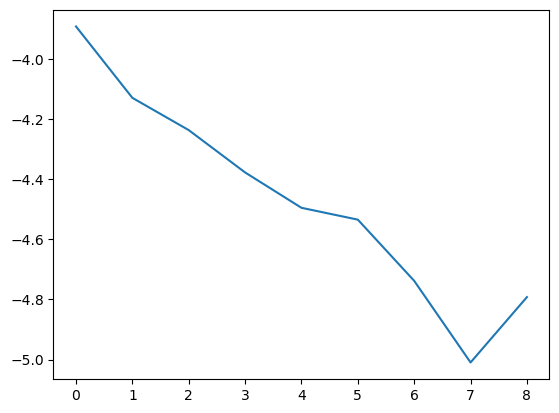

In [38]:
sns.lineplot(coherence_scores)
plt.show()
sns.lineplot(perplexity_scores)
plt.show()

<Axes: >

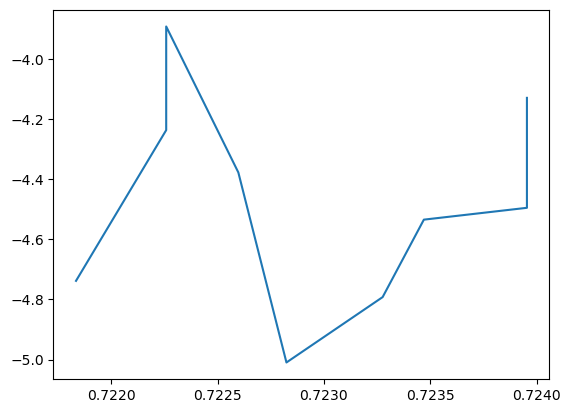

In [37]:
sns.lineplot(x=coherence_scores, y=perplexity_scores)
#plt.show()